In [2]:
from firstSteps import *
from firstSteps import tools
from firstSteps import parameterEQ
import numpy as np
from astropy import constants as const
from astropy import units as u
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

In [59]:
# Units
cmcubed = 1/ (1 * u.cm ** 3)
kelv = 1 * u.K
grams = 1 * u.g
gauss = 1 * u.cm ** (-1/2) * u.g ** (1/2) * 1/(1*u.s) # Gauss units in cgs
rads = 1 * u.rad
Hz = 1 * u.Hz

# Parameters
n_dens = 1 * cmcubed
b_field = 30 * gauss
theta_b = 60 * (np.pi/180) * rads
theta_e = 10
gamma = theta_e
blkmass = 10 ** 18 *grams
nu = 230 * 10 ** 9 * Hz
#temp = parameterEQ.temp_from_thetaE(theta_e)
#theta_e = parameterEQ.theta_e(temp)

In [60]:
# Test Each Function

print(parameterEQ.nu_b(b_field))
print(parameterEQ.nu_c(theta_b, b_field, theta_e))
print(parameterEQ.j_emission_nu(nu, n_dens, theta_e, theta_b, b_field, gamma))
print(parameterEQ.j_emission_x(1, n_dens, theta_e, theta_b, b_field, gamma))
print(parameterEQ.intensity(10))
print(parameterEQ.specific_intensity(parameterEQ.j_emission_nu(nu, n_dens, theta_e, theta_b, b_field, gamma), blkmass))
print(parameterEQ.bright_temp(1 * u.Hz, 1 * (u.erg / u.cm ** 2)))
# print(parameterEQ.temp_from_thetaE(theta_e))
# print(parameterEQ.theta_e(1*u.K))

83977469.61699912 Hz
10908993305.078564 Hz
1.29262057114346e-22 erg / (cm3 Hz s)
3.6795768558053103e-22 erg / (cm3 Hz s)
0.09210600937774048
9.599207528471039e-32 erg / cm2
3.25482863036448e+36 K


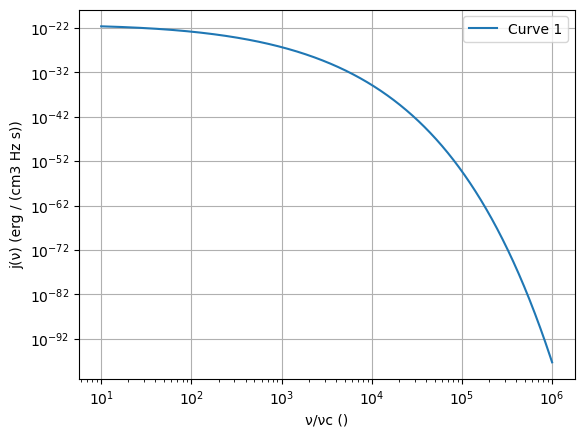

In [75]:
x_array = np.logspace(1, 6, 1000) * u.dimensionless_unscaled
tools.plot_with_units(x_array, parameterEQ.j_emission_x(x_array, n_dens, theta_e, theta_b, b_field, gamma), "Curve 1", '\u03BD/\u03BDc', 'j(\u03BD)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(visible=True)
#Equation 24 in paper is different than this

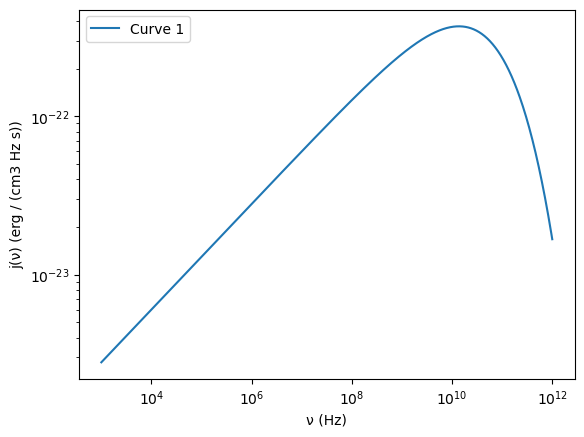

In [23]:
nu_array = np.logspace(3, 12, 1000) * Hz
tools.plot_with_units(nu_array, parameterEQ.j_emission_nu(nu_array, n_dens, theta_e, theta_b, b_field, gamma), "Curve 1", '\u03BD', 'j(\u03BD)')
plt.legend()
plt.xscale('log')
plt.yscale('log')

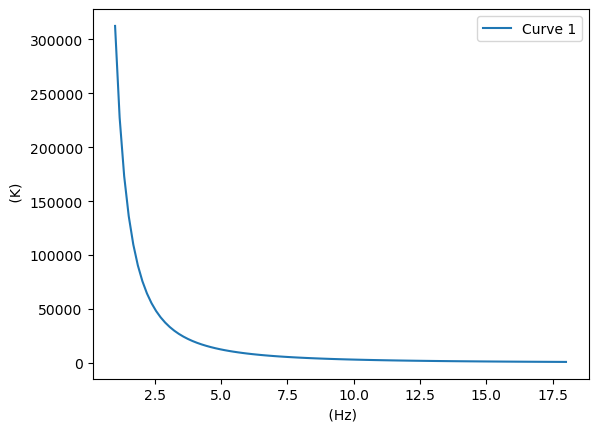

In [55]:
#nu_array = np.logspace(3, 12, 1000) * Hz
nu_array = np.linspace(1, 18, 100) * Hz
tools.plot_with_units(nu_array, parameterEQ.bright_temp(nu_array, parameterEQ.specific_intensity( 
    parameterEQ.j_emission_nu(nu, n_dens, theta_e, theta_b, b_field, gamma), blkmass)), "Curve 1")
plt.legend()
#plt.xscale('log')
#plt.yscale('log')
